<a href="https://colab.research.google.com/github/sadevans/DS_ML_tasks/blob/main/goodreads_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты

In [11]:
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams

In [12]:
# os.chdir(r'/kaggle/working')
# from IPython.display import FileLink

In [13]:
# FileLink(r'train_text_new.csv')

In [14]:
sns.set_style('darkgrid')
sns.set_context('paper')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [15]:
import string
import re
import nltk


from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
# sns.set_style('darkgrid')
# plt.rcParams['figure.figsize'] = (17,7)
# plt.rcParams['font.size'] = 18

True

In [18]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
sns.set_context('paper')

In [20]:
# import torch
# device = "cuda" if torch.cuda.is_available() else "cpu"

# Считывание данных, просмотр их структуры

In [ ]:
# df = pd.read_csv('D:\Kaggle\Goodreads Books Reviews\goodreads-books-reviews-290312\goodreads_train.csv')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/BooksReview/goodreads_train.csv')
# df_test = pd.read_csv('/content/drive/MyDrive/BooksReview/goodreads_test.csv')

In [ ]:
# df_test = pd.read_csv('/kaggle/input/goodreads/goodreads_test.csv')

In [ ]:
# df_test = pd.read_csv('D:\Kaggle\Goodreads Books Reviews\goodreads-books-reviews-290312\goodreads_test.csv')

In [ ]:
df.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0


In [ ]:
print('Размер train датасета:', df.shape)
print('Размер test датасета:', df_test.shape)

Размер train датасета: (900000, 11)
Размер test датасета: (478033, 10)


In [ ]:
print('Информация о train датасете\n')
df.info()

print('Информация о test датасете\n')
df_test.info()

Информация о train датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB
Информация о test датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478033 entries, 0 to 478032
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       478033

Посмотрим, есть ли вообще дублированный текст отзывов.

In [ ]:
print('Количество дубликатов в train датасете', df.duplicated(['book_id','review_text','rating']).sum())
print('Количество дубликатов в test датасете', df_test.duplicated(['book_id','review_text']).sum())

Количество дубликатов в train датасете 42
Количество дубликатов в test датасете 33


In [ ]:
df.drop_duplicates(subset=['book_id','review_text','rating'])

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1
...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0


In [ ]:
df_test.drop_duplicates(subset=['book_id','review_text'])

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,Thu Nov 01 00:28:39 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Thu Nov 01 00:00:00 -0700 2012,0,0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,Thu Oct 18 00:57:00 -0700 2012,Mon Apr 01 23:00:51 -0700 2013,Sat Mar 30 00:00:00 -0700 2013,Fri Mar 29 00:00:00 -0700 2013,0,0
...,...,...,...,...,...,...,...,...,...,...
478028,35cef391b171b4fca45771e508028212,15745950,0e1db3d4b04256f9660f5d276ddf1314,Can't wait for Travis' POV \n Travis Before Ab...,Sun Aug 05 10:26:12 -0700 2012,Tue Apr 16 17:24:00 -0700 2013,Tue Apr 16 00:00:00 -0700 2013,NaN,0,0
478029,35cef391b171b4fca45771e508028212,10861195,0b7f352e58caf0fd1f961e98ef04e89c,Had this on my to-read shelf forever. Will upd...,Tue Jul 10 23:31:00 -0700 2012,Fri Dec 28 20:05:51 -0800 2012,NaN,NaN,0,0
478030,35cef391b171b4fca45771e508028212,6131164,9b19eff33ddb14e9e68fca2e90379e46,The last book left me wanting for more. I need...,Tue Jul 10 19:45:17 -0700 2012,Mon Mar 25 18:41:51 -0700 2013,Tue Mar 19 00:00:00 -0700 2013,NaN,0,0
478031,35cef391b171b4fca45771e508028212,10025305,8be463fed78f0da63e964706f710332b,Things are heating up in the second novel of I...,Thu Jul 05 19:19:30 -0700 2012,Thu Jan 24 16:24:54 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,NaN,0,0


In [ ]:
print('Количество уникальных отзывов в train', len(df['review_id'].unique()))
print('Количество уникальных пользователей в train', len(df['user_id'].unique()))
print('Количество уникальных книг в train', len(df['book_id'].unique()))

print('Количество уникальных отзывов в test', len(df_test['review_id'].unique()))
print('Количество уникальных пользователей в test', len(df_test['user_id'].unique()))
print('Количество уникальных книг в test', len(df_test['book_id'].unique()))

Количество уникальных отзывов в train 900000
Количество уникальных пользователей в train 12188
Количество уникальных книг в train 25474
Количество уникальных отзывов в test 478033
Количество уникальных пользователей в test 6705
Количество уникальных книг в test 25399


In [ ]:
print('Количество пустых значений в train датасете')
df.isna().sum()

Количество пустых значений в train датасете


user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

In [ ]:
print('Количество пустых значений в test датасете')
df_test.isna().sum()

Количество пустых значений в test датасете


user_id              0
book_id              0
review_id            0
review_text          0
date_added           0
date_updated         0
read_at          42478
started_at      143044
n_votes              0
n_comments           0
dtype: int64

Видим, что пустые значения есть только в колонках с датой начала и конца чтения, что свидетельствует о том, что в целом не все пользователи заполняют эти поля и мало кто отслеживает. Из дат можно вытащить колво дней,за которое читалась книга. Для значений NaN проставить среднее.

# Распределение целевой переменной

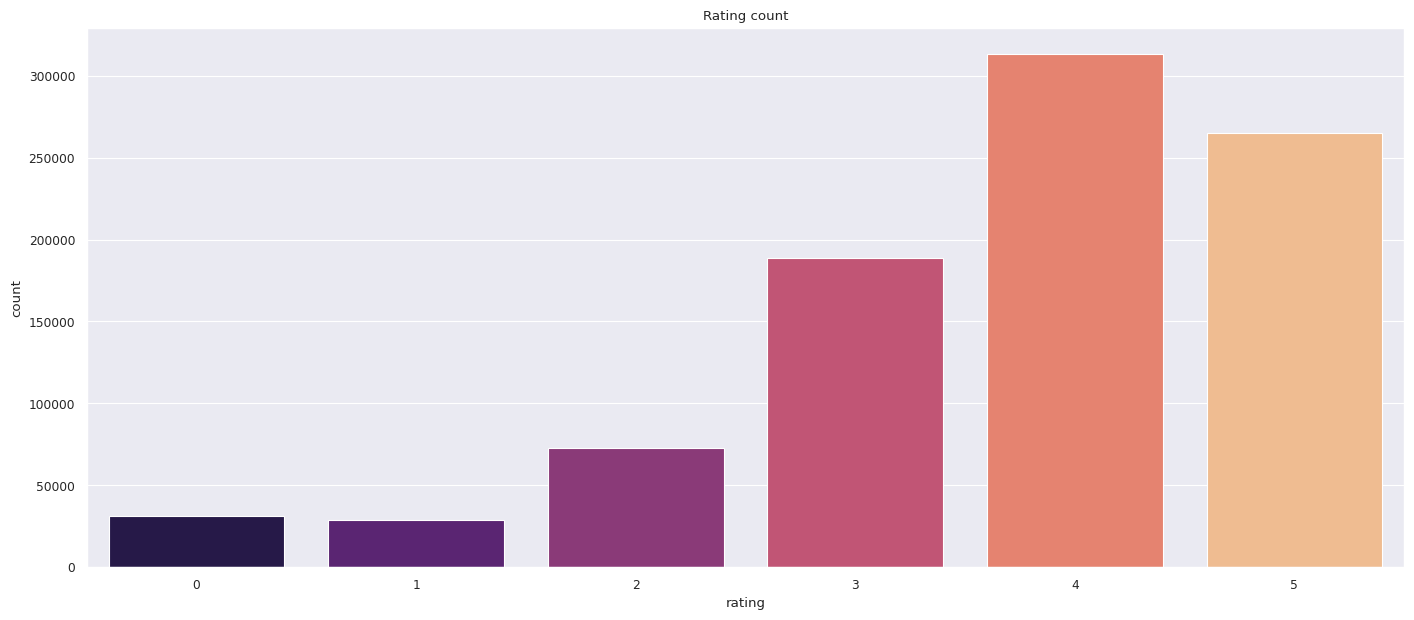

In [ ]:
sns.countplot(x = 'rating', data = df, palette = 'magma')
plt.title('Rating count')
plt.show()

Видим, что чаще всего ставят оценку 4, оценки 0 и 1 встречаются практически одинаковое количество раз и очень редко (~25к каждый) => 
достаточно маленький процент пользователей дает плохуй оценку книгам, возможно многие боятся ставить высокую оценку, 
поэтому, выбирают 4.

Посмотрим точный процент всех отметок от общего числа

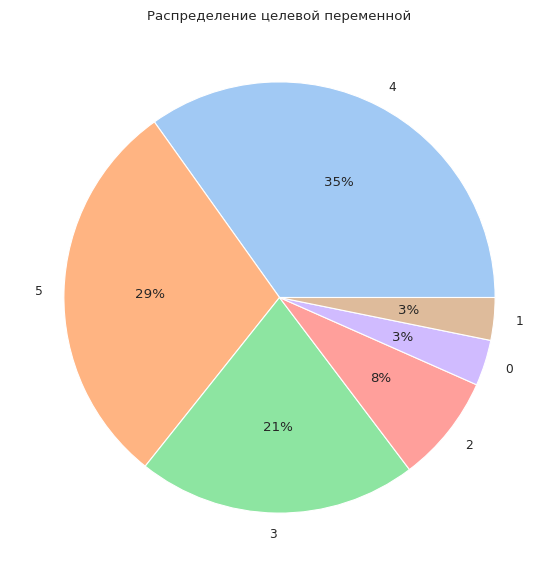

In [ ]:
colors = sns.color_palette('pastel')[0:6]
data = df['rating'].value_counts()
labels = data.index

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Распределение целевой переменной')
plt.show()

Видим, что у нас крайне несбалансированные данные, большее количество значений распределено между более высокими рейтингами - 3,4 и 5.

# EDA

Возможные гипотезы и в целом мысли:
 - какие-то пользователи могут в целом ставить высокие или низкие оценки всем книгам, нельзя сразу выкидывать из датасета айдишник пользователя, нужно посмотреть соотношение
 - можно посмотреть на айдишники книг, какие-то могут получать в целом плохие/хорошие отзывы => тогда если встретим в тесте айдишник на котором уже обучались, можем знать, какую оценку ставить
 - из дат начала и конца чтения можно вытащить колво дней, которое уходит а чтение книги.
 - для значений NaN дат начала и конца чтения можно проставить среднее время,за которое читается эта книга или среднее,за которое читает пользователь.
 - колво войтсов играет роль, тк люди могли прочитать плохой/хороший отзыв, лайкнуть его, прочитать книгу и тоже оставить плохой/хороший отзыв и соответствующую оценку (т.е. отзывы с большим колвом войтсов оказывают влияние на рейтинг книги в последующем)
 - семантическая окраска отзыва играет значение -> провести анализ на семантику
 - посмотреть на длину отзыва в целом, среднюю длину предложения, слова и колво слов в предложении, все это может играть роль при выставлении рейтинга
 

## Анализ и добавление новых числовых и категориальных признаков

Посмотрим на пересчение по пользователям в train и test датасетах, чтобы понять, стоит ли тратить время и ресурсы на проверку первой гипотезы. Аналогично со второй.

In [ ]:
print('Пользователи в обоих датасетах')
np.intersect1d(df["user_id"].unique(), df_test["user_id"].unique())

Пользователи в обоих датасетах


array(['b9450d1c1f97f891c392b1105959b56e'], dtype=object)

In [ ]:
print('Колво строк в test датасете с общим пользователем')
df[df['user_id'] == np.intersect1d(df["user_id"].unique(), df_test["user_id"].unique())[0]].count()[0]

Колво строк в test датасете с общим пользователем


42

Видим, что всего один пользователь присутствует в обоих датасетах и в test с ним не так уж много строк. Не будем тратить время на работу с пользователями.

In [ ]:
print('Книги в обоих датасетах', len(np.intersect1d(df["book_id"].unique(), df_test["book_id"].unique())))
print(np.intersect1d(df["book_id"].unique(), df_test["book_id"].unique()))

Книги в обоих датасетах 25398
[       1        2        3 ... 36252773 36307629 36328685]


А вот по книгам достаточно большое пересечение, можно поработать с этим. 

Дропнем колонку с айди отзыва, тк она в себе не несет никакой информативной ценности,поскольку на уникальность мы уже датасет проверили.

In [ ]:
df = df.drop(columns = ['review_id'])
df_test = df_test.drop(columns = ['review_id'])
df.head(3)

,user_id,book_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0


Посмотрим для начала на мини тепловую карту датасета, может быть какие-то колонки коррелируют между собой.

<Axes: >

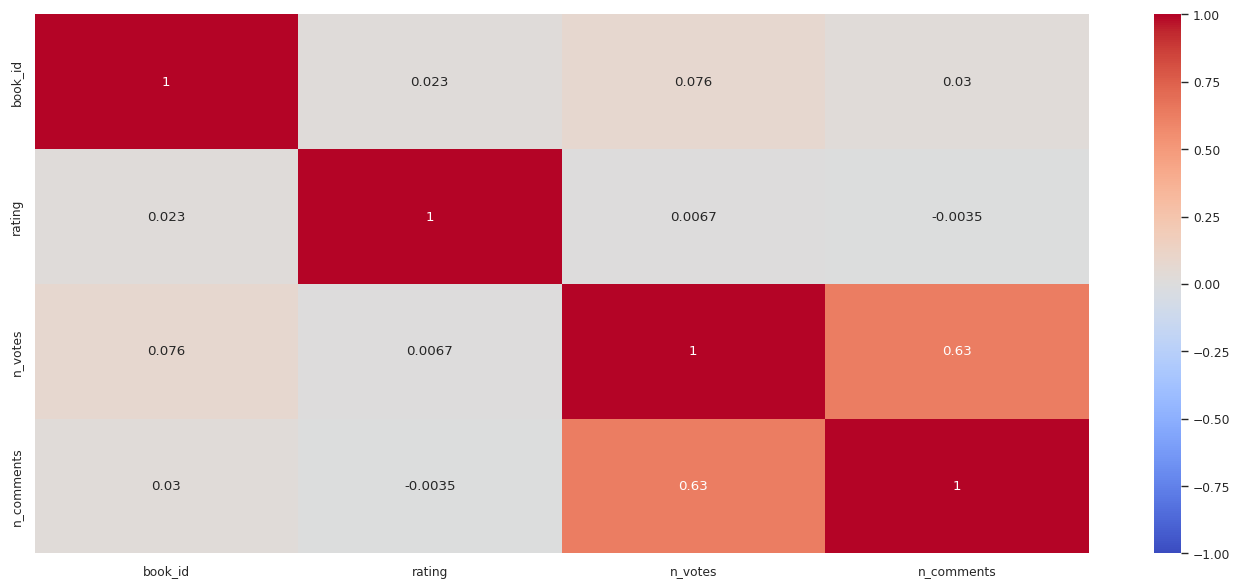

In [ ]:
sns.heatmap(df[['book_id', 'rating', 'n_votes', 'n_comments']].corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Видим, что колво войтсов и комментариев коррелируют между собой. Посмотрим внимательнее на значения комментарией и войтсов.

In [ ]:
print('Количество отрицательных n_votes',df[df['n_votes'] < 0].count()[0])
print('Количество отрицательных n_comments',df[df['n_comments'] < 0].count()[0])

Количество отрицательных n_votes 46
Количество отрицательных n_comments 8


Отрицательные n_votes можно считать за дизлайки, но непонятно, что делать с отрицательными n_comments. Учитывая еще тепловую карту, можем дропнуть n_comments.

In [ ]:
df = df.drop(columns = ['n_comments'])
df_test = df_test.drop(columns = ['n_comments'])

Посмотрим на зависимость рейтинга от колва войтсов

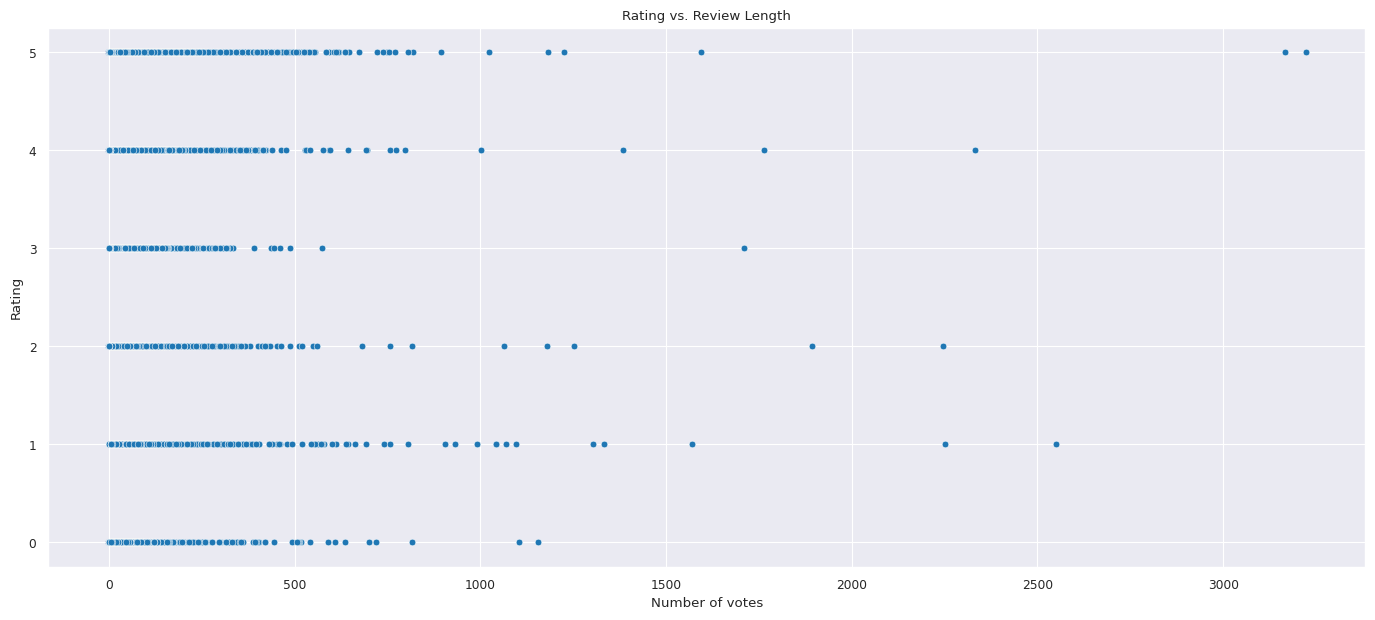

In [ ]:
sns.scatterplot(x=df['n_votes'], y=df['rating'])
plt.xlabel('Number of votes')
plt.ylabel('Rating')
plt.title('Rating vs. Review Length')
plt.show()

Видно, что для рейтингов 1 и 5 очень часто ставят войтсы, значения на графике расположены плотно друг к другу и их достаточно много. Самые залайканные - отзывы с рейтингом 5, 1, 2.

Посчитаем теперь колво дней, за которое читал каждую книгу каждый пользователь.

In [ ]:
df['started_at_dt'] = pd.to_datetime(df.started_at) 
df['read_at_dt'] = pd.to_datetime(df.read_at) 
df['duration_dt'] = df.read_at_dt - df.started_at_dt 
df['read_length_days'] = df.duration_dt.dt.days 

In [ ]:
df_test['started_at_dt'] = pd.to_datetime(df_test.started_at, errors = 'coerce') 
df_test['read_at_dt'] = pd.to_datetime(df_test.read_at, errors = 'coerce') 
df_test['duration_dt'] = df_test.read_at_dt - df_test.started_at_dt 
df_test['read_length_days'] = df_test.duration_dt.dt.days 

In [ ]:
df = df.drop(columns = ['started_at_dt', 'read_at_dt'])
df_test = df_test.drop(columns = ['started_at_dt', 'read_at_dt', 'duration_dt'])

In [ ]:
df = df.drop(columns = ['started_at', 'read_at', 'date_added',	'date_updated'])
df_test = df_test.drop(columns = ['started_at', 'read_at', 'date_added',	'date_updated'])

In [ ]:
# df_new = df.to_csv(r'/content/drive/MyDrive/BooksReview/df_new.csv', index= False)
# with open('/content/drive/MyDrive/BooksReview/df_new.csv', 'w') as f:
#   f.write(df_new)

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/BooksReview/df_new.csv')

In [ ]:
df.sample(5, random_state = 42)

,user_id,book_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,read_length_days
527984,2fb9a15c821488faf58f15d9f2fe96f2,140079,4,I'm proudly telling you that I'm a big fan of ...,Sat Apr 09 05:52:45 -0700 2011,Mon Apr 25 08:46:47 -0700 2011,Sat Apr 09 00:00:00 -0700 2011,NaN,0,NaN
618093,7d2b7728c429ad7b4454ac69ddb2284c,9520360,4,"4.25 stars \n This was so, so much better than...",Wed Mar 23 14:17:52 -0700 2016,Sat Apr 02 03:51:04 -0700 2016,Thu Mar 24 13:27:04 -0700 2016,Wed Mar 23 00:00:00 -0700 2016,3,1.0
484217,5e6727497b317e459c0acb0eabf93870,11737387,3,For some reason finding a good male lead urban...,Thu Nov 14 11:59:22 -0800 2013,Tue Jul 22 12:06:38 -0700 2014,Wed Feb 12 14:02:29 -0800 2014,Wed Feb 05 00:00:00 -0800 2014,1,7.0
161123,53573268e15260bce9b063fc31ccd3ad,12814333,4,It's about the son of a pepper merchant who fi...,Wed Jul 24 18:38:02 -0700 2013,Tue May 20 14:10:04 -0700 2014,Tue Jul 30 00:00:00 -0700 2013,Wed Jul 24 00:00:00 -0700 2013,0,6.0
718642,02651037306c57971dea2f24ec9be70f,6339664,4,the most beautiful display of emotions in this...,Wed Oct 22 07:51:25 -0700 2014,Fri Sep 25 06:11:45 -0700 2015,Mon Dec 22 06:26:43 -0800 2014,Sun Dec 07 00:00:00 -0800 2014,0,15.0


Посмотрим, сколько NaN значений теперь в колонке длительности чтения.

In [ ]:
df.isna().sum()[-1]

284493

Посмотрим на распределние колва дней чтения и зависимость рейтинга от колва дней чтения

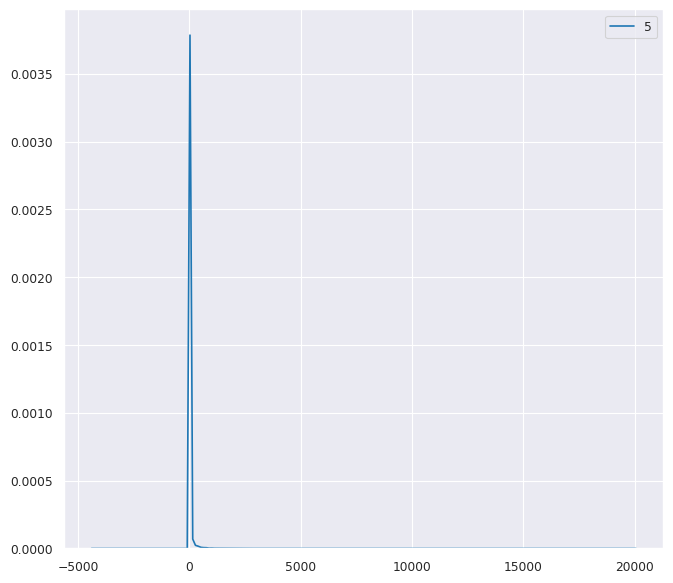

In [ ]:
plt.subplot(1,2,1)
sns.kdeplot(x = df['read_length_days'])
plt.legend(df['rating'].unique())
plt.xlabel('')
plt.ylabel('')

plt.show()

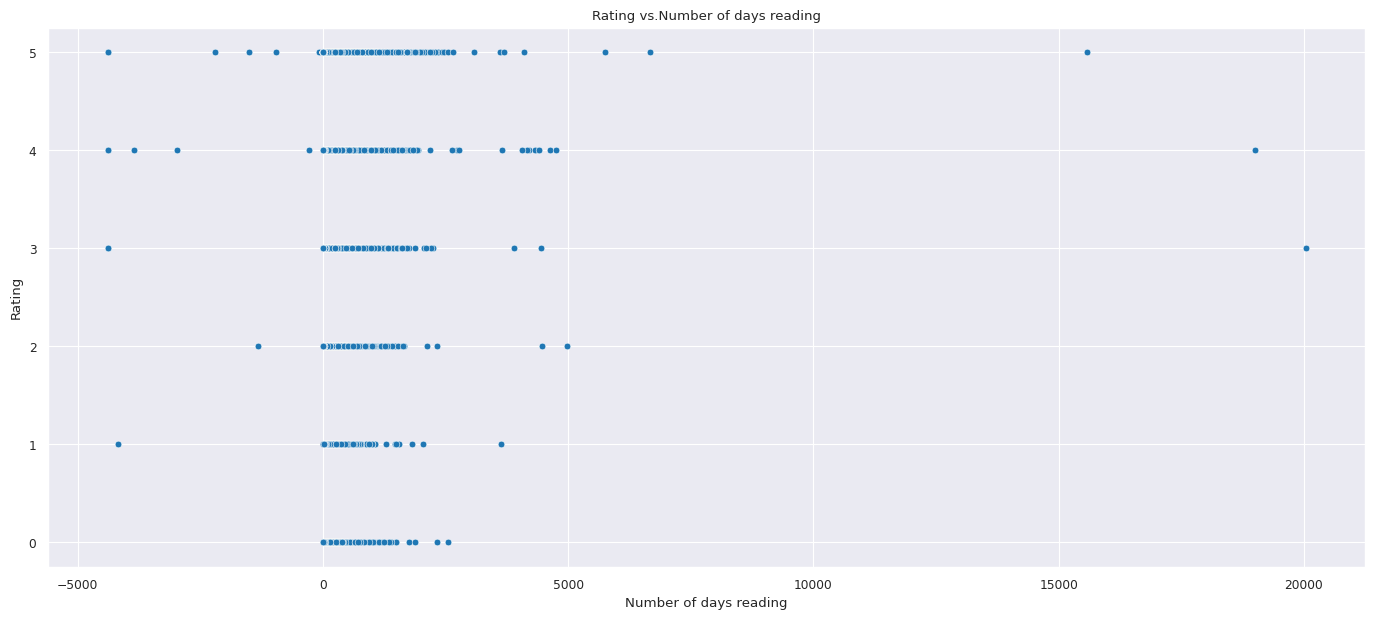

In [ ]:
sns.scatterplot(x=df['read_length_days'], y=df['rating'])
plt.xlabel('Number of days reading')
plt.ylabel('Rating')
plt.title('Rating vs.Number of days reading')
plt.show()

Книги с более высоким рейтингом читаются больше и дольше. Плотность распределения значения выше. Также видим, что есть отрицательное колво дней, посмотрим, сколько таких значений.

In [ ]:
df[df['read_length_days'] < 0].count()[0]

19

In [ ]:
df['read_length_days'].value_counts()

 1.0       122612
 0.0       107493
 2.0        82986
 3.0        55308
 4.0        40082
            ...  
 1334.0         1
 1294.0         1
-4381.0         1
 955.0          1
 833.0          1
Name: read_length_days, Length: 1356, dtype: int64

In [ ]:
df['read_length_days'].value_counts()
dic = df['read_length_days'].value_counts()
dic.items()

Посмотрим, за какое колво дней в целом чаще читают книги

In [ ]:
def plot_top_reading_length(data): 
    dic = data.value_counts()
           
    top = sorted(dic.items(), key = lambda x: x[1], reverse=True)[:10] 
    x, y = zip(*top)

    fig, ax = plt.subplots()
    ax.bar(x,y)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xlabel('Number of days reading')
    plt.ylabel('Frequency')
    plt.title('Frequency vs.Number of days reading')

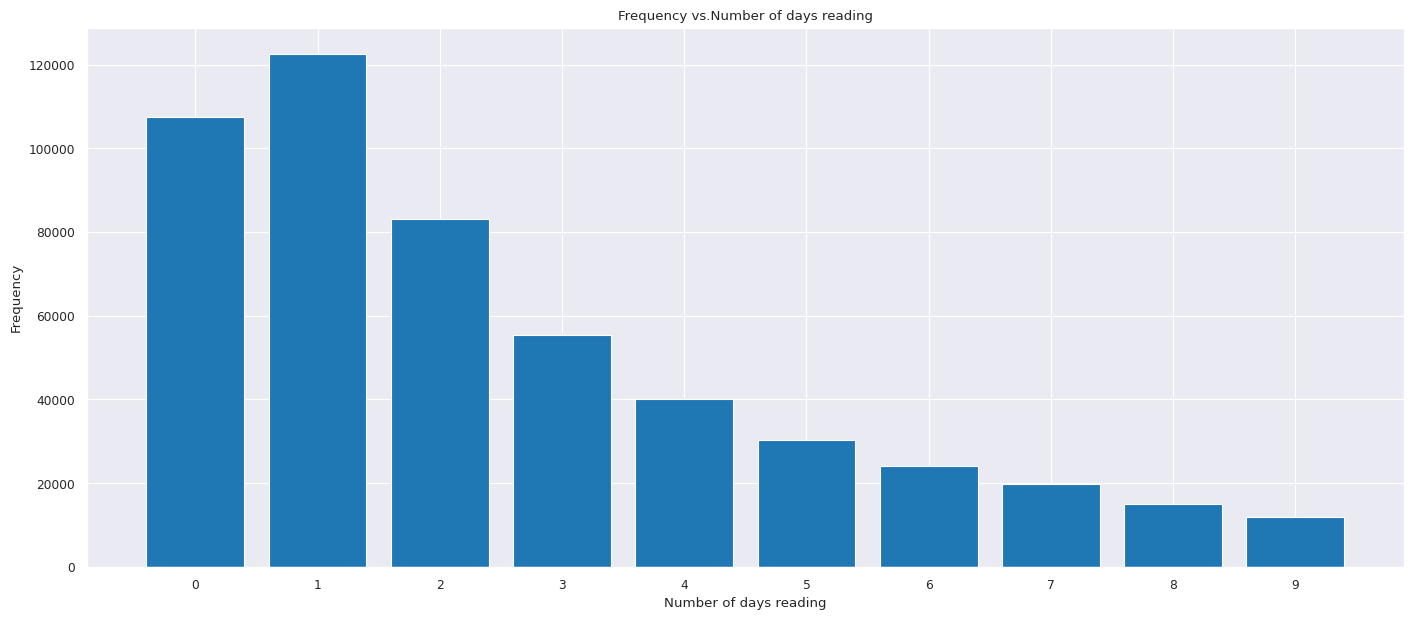

In [ ]:
plot_top_reading_length(df['read_length_days'])

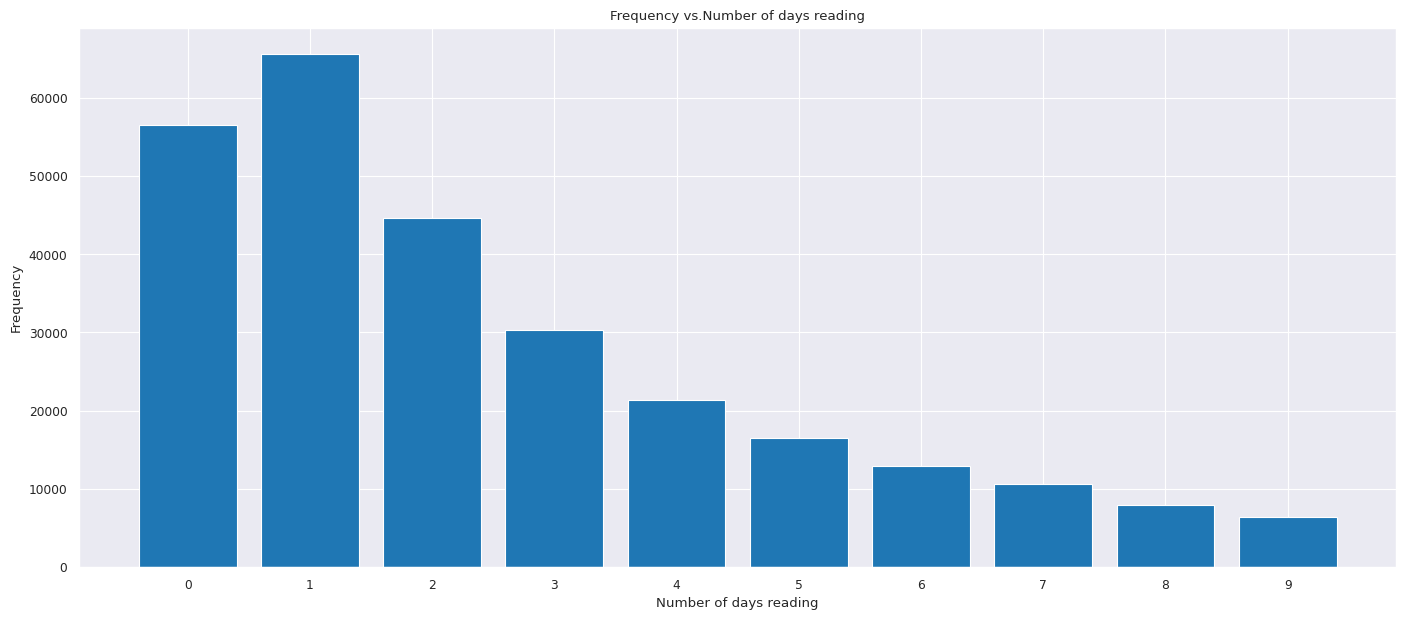

In [ ]:
plot_top_reading_length(df_test['read_length_days'])

Чаще всего книги читают за день, поэтому заполним значения NaN и отрицательные значения единичками.

In [ ]:
df['read_length_days'] = df['read_length_days'].fillna(1)
df[df['read_length_days'] < 0] = 1

df_test['read_length_days'] = df_test['read_length_days'].fillna(1)
df_test[df_test['read_length_days'] < 0] = 1

print('Колво отрицательных значений read_length_days', df[df['read_length_days'] < 0].count()[0])
df.isna().sum()

Колво отрицательных значений read_length_days 0


user_id                  0
book_id                  0
rating                   0
review_text              0
date_added               0
date_updated             0
read_at              91766
started_at          274297
n_votes                  0
read_length_days         0
dtype: int64

In [ ]:
# df = pd.read_csv('/kaggle/input/new-goodreads/new_train.csv')
# df.head(3)

In [ ]:
#df_new = df.to_csv(r'/content/drive/MyDrive/BooksReview/df_new.csv', index= False) #сохраним измененный датасет

In [ ]:
# sns.heatmap(df[['book_id', 'rating', 'n_votes', 'n_comments', 'read_length_days']].corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
df.to_csv('/content/drive/MyDrive/BooksReview/goodreads_train_upd.csv', index= False)
df_test.to_csv('/content/drive/MyDrive/BooksReview/goodreads_test_upd.csv', index= False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BooksReview/goodreads_train_upd.csv')
df_test = pd.read_csv('/content/drive/MyDrive/BooksReview/goodreads_test_upd.csv')

In [ ]:
df.head(2)

,user_id,book_id,rating,review_text,n_votes,read_length_days
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,This is a special book. It started slow for ab...,28,10.0
1,8842281e1d1347389f2ab93d60773d4d,16981,3,Recommended by Don Katz. Avail for free in Dec...,1,1.0


## Анализ отзывов

- посчитаем для каждого отзыва его длину, кол-во слов. среднюю длину предложения и среднюю длину слова
- почистим отзывы: удалим ссылки, цифры, стоп-слова
- приведем все отзывы к нижнему регистру, лемматизируем
- посмотрим на эмоциональную окраску каждого отзыва
- посмотрим присутствуют ли спойлеры в отзывах, проставим 1 или 0 соответственно
- мб удалим слишком короткие отзывы или неинформативные отзывы



In [ ]:
# df_new = pd.read_csv(r'D:\Kaggle\Goodreads Books Reviews\goodreads-books-reviews-290312\new_train.csv')

In [ ]:
# df_test_text = df_test[['review_text']]
# df_text = df[['review_text']]

In [ ]:
# test_text = df_test_text.to_csv('/kaggle/working/test_text.csv', index = False)

In [ ]:
# df_new = pd.read_csv('/content/drive/MyDrive/BooksReview/new_train.csv')

In [ ]:
# df_new.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,started_at_dt,read_at_dt,duration_dt,read_length_days
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,2017-08-15 13:23:18-07:00,2017-08-26 12:05:52-07:00,10 days 22:42:34,10.0
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,NaN,NaN,NaN,1.0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,2017-03-17 23:45:40-07:00,2017-03-18 23:22:42-07:00,0 days 23:37:02,0.0


In [ ]:
# df_text = df_new[['rating', 'review_text']]

In [ ]:
# df_text.sample(5, random_state = 42)

,review_text
527984,I'm proudly telling you that I'm a big fan of ...
618093,"4.25 stars \n This was so, so much better than..."
484217,For some reason finding a good male lead urban...
161123,It's about the son of a pepper merchant who fi...
718642,the most beautiful display of emotions in this...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           900000 non-null  object 
 1   book_id           900000 non-null  int64  
 2   rating            900000 non-null  int64  
 3   review_text       900000 non-null  object 
 4   n_votes           900000 non-null  int64  
 5   read_length_days  900000 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 41.2+ MB


In [ ]:
df['review_text'].sample(5, random_state = 42)

527984    I'm proudly telling you that I'm a big fan of ...
618093    4.25 stars \n This was so, so much better than...
484217    For some reason finding a good male lead urban...
161123    It's about the son of a pepper merchant who fi...
718642    the most beautiful display of emotions in this...
Name: review_text, dtype: object

In [ ]:
def count_spoiler_rating(text):
    spoil_rating = r'(\d+ stars)|(\d+\.\d+ stars)'
    spisok = re.findall(spoil_rating, text)
    #text = re.sub(regular, '', text)
    #spisok = re.findall('(\d+) stars', text)
    #spisok1 = re.findall('(\d+\.\d+) stars', text)
    #spisok1 = re.findall('(\f+) stars', str(text))
    #spisok = re.sub('stars+', '', text)
    return spisok

Добавим колонку с длиной отзыва

In [ ]:
df['review_length'] = df['review_text'].str.len()
df_test['review_length'] = df_test['review_text'].str.len()
df.head(3)

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,This is a special book. It started slow for ab...,28,10.0,2119
1,8842281e1d1347389f2ab93d60773d4d,16981,3,Recommended by Don Katz. Avail for free in Dec...,1,1.0,93
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",22,0.0,2598


Теперь посчитаем колво слов в каждом отзыве

In [ ]:
def word_count(text):
    review_words = str(text).split()
    return len(review_words)

In [ ]:
df['word_count'] = df['review_text'].apply(word_count)
df_test['word_count'] = df_test['review_text'].apply(word_count)

In [ ]:
df.head(3)

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length,word_count
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,This is a special book. It started slow for ab...,28,10.0,2119,368
1,8842281e1d1347389f2ab93d60773d4d,16981,3,Recommended by Don Katz. Avail for free in Dec...,1,1.0,93,10
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",22,0.0,2598,468


Посчитаем среднюю длину слова в отзыве.

In [ ]:
# def plot_word_number_histogram(text):
#     text.str.split().
#         map(lambda x: len(x)).\
#         hist()

In [ ]:
# df['word_count'] = df['review_text'].str.split().map(lambda x: len(x))
# df.head(3)

In [ ]:
df['mean_word_length'] = df['review_text'].map(lambda rev: np.mean([len(word) for word in str(rev).split()]))
df_test['mean_word_length'] = df_test['review_text'].map(lambda rev: np.mean([len(word) for word in str(rev).split()]))

df.head(3)

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length,word_count,mean_sent_length,mean_word_length
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,This is a special book. It started slow for ab...,28,10.0,2119,368,104.500000,4.722826
1,8842281e1d1347389f2ab93d60773d4d,16981,3,Recommended by Don Katz. Avail for free in Dec...,1,1.0,93,10,46.000000,8.400000
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",22,0.0,2598,468,70.972222,4.532051


Посчитаем среднюю длину предложения в отзыве

In [ ]:
df['mean_sent_length'] = df['review_text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(str(rev))]))
df_test['mean_sent_length'] = df_test['review_text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(str(rev))]))

df.head(3)

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length,word_count,mean_sent_length
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,This is a special book. It started slow for ab...,28,10.0,2119,368,104.500000
1,8842281e1d1347389f2ab93d60773d4d,16981,3,Recommended by Don Katz. Avail for free in Dec...,1,1.0,93,10,46.000000
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ...",22,0.0,2598,468,70.972222


Посмотрим на графики.

In [ ]:
def plotting_bars(col, rate):
    plt.subplot(1,2,1)
    sns.barplot(x = 'rating', y = col, data = df.groupby('rating', as_index=False)[col].mean(), palette = 'magma')
    plt.title('Rating vs ' + str(col))
    plt.ylabel(col, labelpad=12.5)
    plt.xlabel('rating', labelpad=12.5)
    
    plt.show()

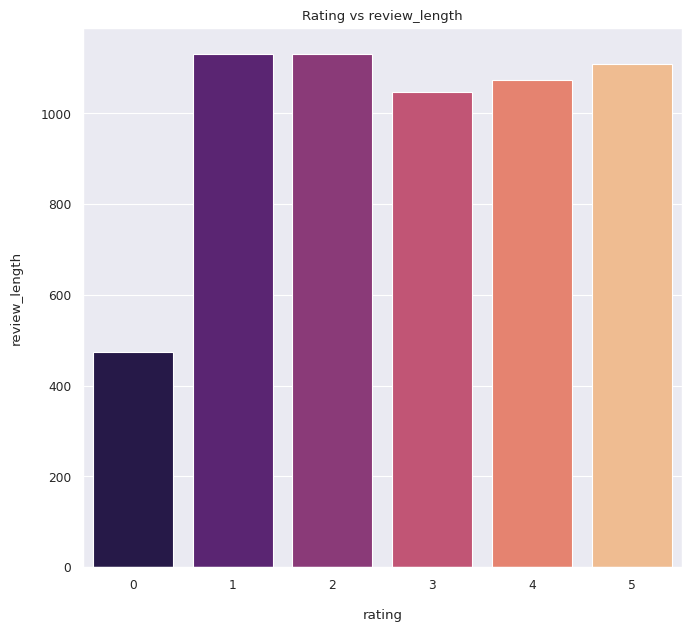

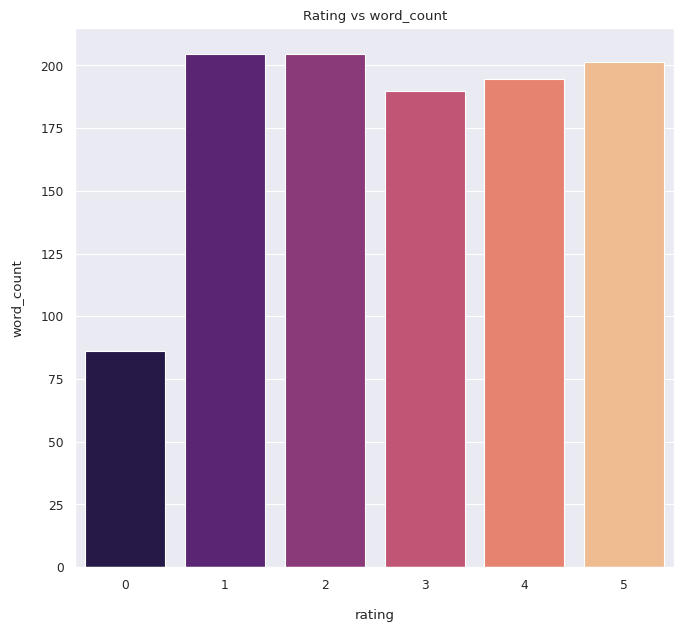

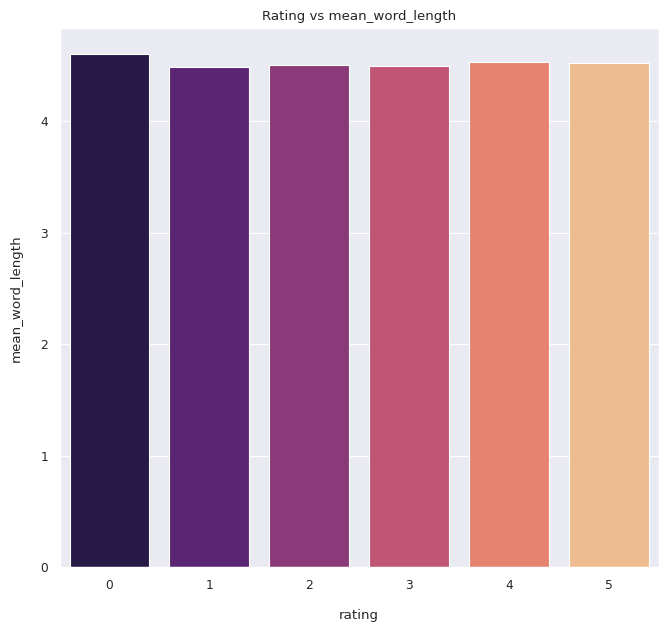

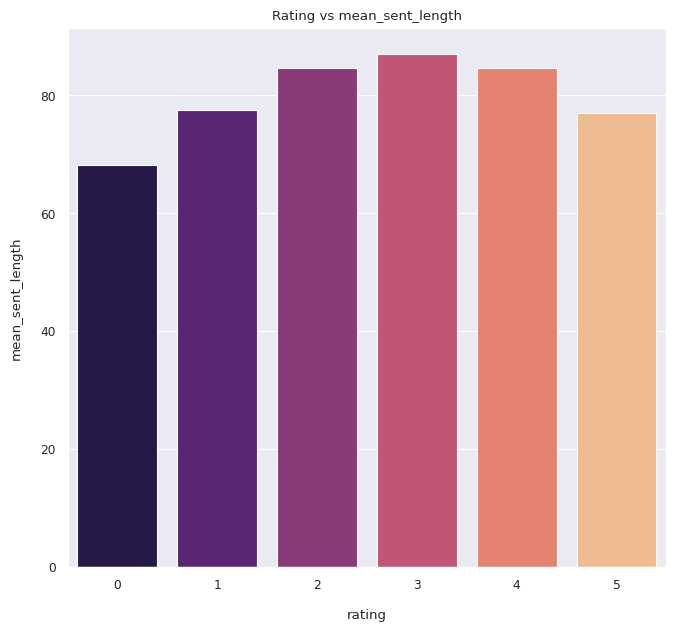

In [ ]:
features = ['review_length','word_count','mean_word_length','mean_sent_length']
for feature in features:
    plotting_bars(feature, 'rating')

Видим, что в среднем для всех рейтингов длина слова окло 4х -> пользователи чаще используют короткие слова ? это не так, если много стоп-слов, тк они короткие, посмотрим, какие стоп-слова встречаются часто. Пока что мало что по длине слов мало можно сказать о рейтинге. Длина предложения для рейтинга 3 больше всего. Для рейтинга 0 в целом все не очень, маленькие отзывы,маленькие предложения и небольшое кол-во слов (относительно других рейтингов) -> 0 будет проще классифицировать наверное. 

In [ ]:
df.to_csv('/content/drive/MyDrive/BooksReview/train_text.csv', index = False)
df_test.to_csv('/content/drive/MyDrive/BooksReview/test_text.csv', index = False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BooksReview/train_text.csv')

In [ ]:
df.head(2)

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length,word_count,mean_sent_length,mean_word_length
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,This is a special book. It started slow for ab...,28,10.0,2119,368,104.5,4.722826
1,8842281e1d1347389f2ab93d60773d4d,16981,3,Recommended by Don Katz. Avail for free in Dec...,1,1.0,93,10,46.0,8.400000


In [ ]:
# df_text = pd.read_csv('/content/drive/MyDrive/BooksReview/text_train.csv')

In [ ]:
# df_text = pd.read_csv('/kaggle/input/new-goodreads/text_train.csv')

In [ ]:
# df_text.to_csv('D:\Kaggle\Goodreads Books Reviews\goodreads-books-reviews-290312\train_text.csv', index = False)

In [ ]:
from collections import defaultdict
stop_words = stopwords.words('english')

In [ ]:
stop = set(stopwords.words('english'))

Посмотрим, какие стоп - слова чаще всего встечаются в отзывах.

In [ ]:
# функция подсчета стоп-слов
def stop_words_count(text):
    corpus=[]
    new = text.str.split()
    new = new.values.tolist()
    corpus=[word for i in new for word in i]

    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1
    return dic

In [ ]:
# def plot_top_stopwords_barchart(text):
#     dic = stop_words_count(text)
#     top = 

In [ ]:
dic = stop_words_count(df['review_text'])
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)
top[:20]

In [ ]:
def plot_top_stopwords_barchart(text): 
    dic = stop_words_count(text)
           
    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.subplot(1,1,1)
    # plt.bar(x=x, y=y, height = 100000)
    # plt.title('Top 10 most common stop-words')
    # plt.ylabel('Frequency', labelpad=12.5)
    # plt.xlabel('Stop-word', labelpad=12.5)
    
    # plt.show()

    plt.bar(x,y)
    plt.title('Top 10 most common stop-words')
    plt.ylabel('Frequency', labelpad=12.5)
    plt.xlabel('Stop-word', labelpad=12.5)



In [ ]:
# plot_top_stopwords_barchart(df['review_text'])

In [ ]:
def plot_top_non_stopwords_barchart(text):   
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x = y,y = x)

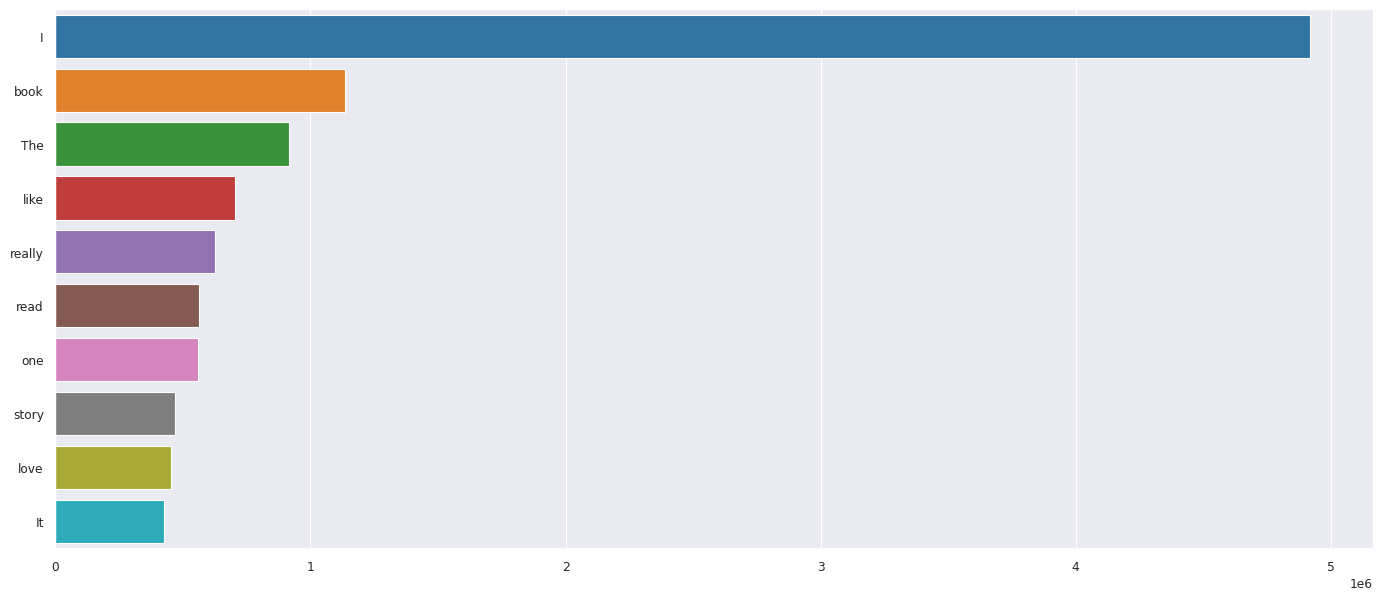

In [ ]:
plot_top_non_stopwords_barchart(df['review_text'])

Посмотрим на n-gramms.

In [ ]:
from nltk.util import ngrams

In [ ]:
# def get_top_ngram(corpus, n=None):
#     vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx])
#                   for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:10]

In [ ]:
# def plot_top_ngrams_barchart(text, n=2):
#     stop=set(stopwords.words('english'))

#     new= text.str.split()
#     new=new.values.tolist()
#     corpus=[word for i in new for word in i]

#     def _get_top_ngram(corpus, n=None):
#         vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
#         bag_of_words = vec.transform(corpus)
#         sum_words = bag_of_words.sum(axis=0) 
#         words_freq = [(word, sum_words[0, idx]) 
#                       for word, idx in vec.vocabulary_.items()]
#         words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#         return words_freq[:10]

#     top_n_bigrams=_get_top_ngram(text,n)[:10]
#     x,y=map(list,zip(*top_n_bigrams))
#     sns.barplot(x=y,y=x)

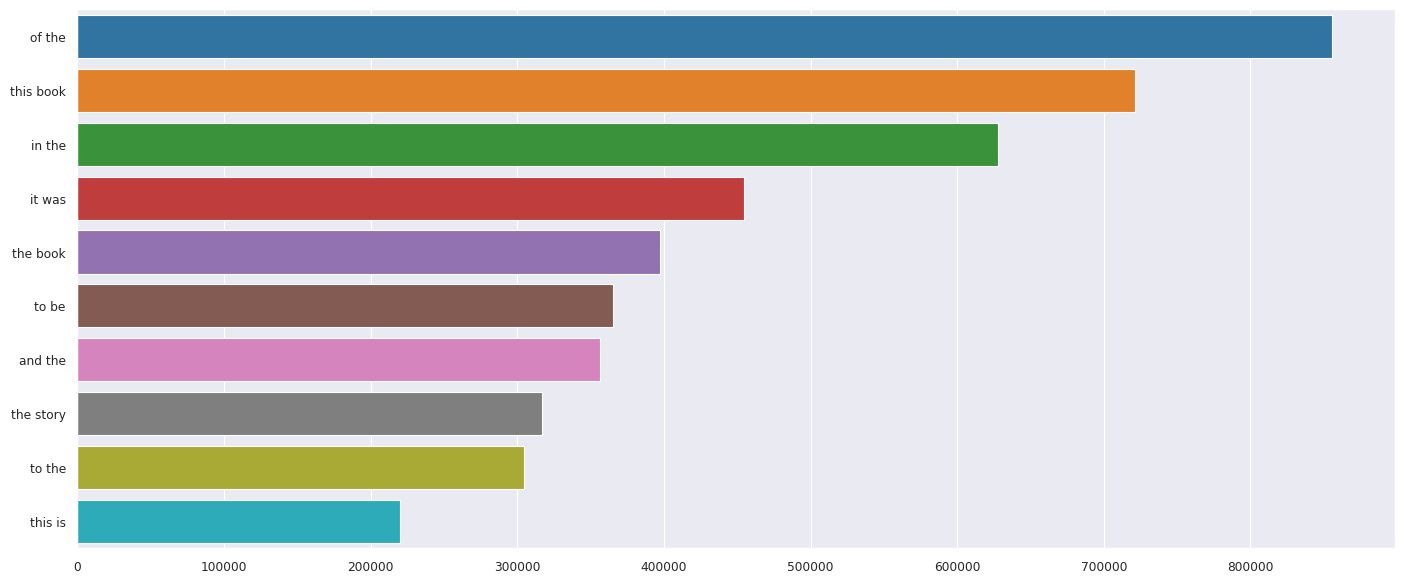

In [ ]:
# plot_top_ngrams_barchart(df_text['review_text'],2)

Проставим наличие/отстутсвие спойлеров у отзыва.

In [ ]:
def if_spoiler(text):
    spoil_statement = 'spoiler alert'
    return [1 if spoil_statement in txt else 0 for txt in text]

In [ ]:
df['spoil'] = if_spoiler(df['review_text'])
df[df['spoil'] == 1]

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length,word_count,mean_sent_length,mean_word_length,spoil
26,8842281e1d1347389f2ab93d60773d4d,62291,5,** spoiler alert ** \n Loved it. The epic saga...,5,25.0,470,88,57.625000,4.306818,1
29,8842281e1d1347389f2ab93d60773d4d,7112495,4,** spoiler alert ** \n An interesting book in ...,7,33.0,3685,647,93.000000,4.663060,1
32,8842281e1d1347389f2ab93d60773d4d,6411961,3,"** spoiler alert ** \n Critics aside, Dan Brow...",3,1.0,923,175,82.727273,4.245714,1
34,8842281e1d1347389f2ab93d60773d4d,77432,5,"** spoiler alert ** \n I equally loved book 2,...",1,1.0,475,97,93.800000,3.865979,1
42,8842281e1d1347389f2ab93d60773d4d,14497,4,** spoiler alert ** \n Just finished this and ...,6,1.0,742,142,91.375000,4.190141,1
...,...,...,...,...,...,...,...,...,...,...,...
899991,b9450d1c1f97f891c392b1105959b56e,16113791,5,** spoiler alert ** \n 4.5 stars. \n This is t...,1,1.0,2775,494,82.727273,4.587045,1
899993,b9450d1c1f97f891c392b1105959b56e,15717943,5,** spoiler alert ** \n 5 Stars! \n Thank you M...,4,1.0,3148,560,67.130435,4.587500,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,4,** spoiler alert ** \n 3.5 stars. \n This book...,1,0.0,1844,335,69.576923,4.471642,1
899998,b9450d1c1f97f891c392b1105959b56e,12275680,4,** spoiler alert ** \n Another fun read from M...,0,1.0,1302,239,67.263158,4.418410,1


In [ ]:
# df_test_text.to_csv(r'/kaggle/working/test_text_new.csv', index = False)
# df_text.to_csv('/kaggle/working/train_text_new.csv', index = False)

Теперь удалим спойлеры. Также приведем все к нижнему регистру, удалим линки, цифры и лишние символы, лемматизируем и токенизируем. Затем добавим эмоциональную окраску.

Сначала сделаем по-тупому через функции, потом засуну это в пайплайн...

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def remove_spoiler_alert(text):
    return re.sub(r'(\(view spoiler\).*?\(hide spoiler\))','',text)

In [ ]:
def to_lower(text):
    return text.lower()

In [ ]:
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split(' ') if word not in stop])

In [ ]:
def cleaned(data):
    stopwords_cleaned = []
    cleaned_text = []
    tokens = []
    for text in data:
    # cleaning  
        text = clean_text(text)
        cleaned_text.append(text)
     
    # tokenization
        text = word_tokenize(text)
        tokens.append(text)
     
    # с помощью цикла for поочередно проверяем каждое слово(токен) текущего сообщения
    # на вхождение в список стоп-слов. Если токен не является стоп-словом, 
    # то добавляем его в список stopwords_cleaned  
        text = [word for word in text if word not in stop_words]
        stopwords_cleaned.append(text)
    return cleaned_text, tokens, stopwords_cleaned

In [ ]:
df['cleaned_rev'], df['tokens_rev'], df['noStopwords_rev']= cleaned(df['review_text'])
# data['tokens_rev'] = tokens
 
# Сохраняем сообщения без стоп-слов в новой колонке 'noStopwords_msg'
# data['noStopwords_rev'] = stopwords_cleaned

In [ ]:
df.to_csv('/content/drive/MyDrive/BooksReview/cleaned_train.csv', index = False)

In [ ]:
df.sample(5, random_state = 42)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# def clean_text(text):
#     text = text.lower()
#     regular = r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]'
#     regular_url = r'(http\S+)|(www\S+)|([\w\d]+www\S+)|([\w\d]+http\S+)'
#     text = re.sub(r'(\(view spoiler\).*?\(hide spoiler\))','',text)
#     text = re.sub(regular, '', text)
#     text = re.sub(regular_url, r'URL', text)
#     text = re.sub(r'(\d+\s\d+)|(\d+)',' ', text)
#     text = re.sub(r'\s+', ' ', text)
#     return text

In [ ]:
# Text cleanup :
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


REPLACE_RE = r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\<+\(\)\/+\:\\+]'
BAD_SYMBOLS_RE = r'[^0-9a-z #+_]'
REMOVE_NUM = r'(\d+\s\d+)|(\d+)'
STOPWORDS = set(stopwords.words('english'))
STOP_URL = r'(http\S+)|(www\S+)|([\w\d]+www\S+)|([\w\d]+http\S+)'
SPOILER_RE = r'(\(view spoiler\).*?|\(hide spoiler\))'
REMOVE = r'\s+'
SPOILER_ALERT = r'spoiler alert'

def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    # lowercase text
    text = text.lower()

    #  delete spoilers
    text = re.sub(SPOILER_RE, '', text)
    text = re.sub(SPOILER_ALERT, '', text)

    #  delete urls
    text = re.sub(STOP_URL, '', text)

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(REPLACE_RE, '', text)
    
    # Remove the XXXX values
    text = text.replace('x', '')
    
    # Remove white space
    text = re.sub(REMOVE_NUM, '', text)

    #  delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub(BAD_SYMBOLS_RE, '', text)

    # #  delete symbols which are in BAD_SYMBOLS_RE from text
    # text = REMOVE.sub('', text)

    # delete stopwords from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
    # removes any words composed of less than 2 or more than 21 letters
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Lemmatizing the words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [ ]:
df['review_text'] = df['review_text'].apply(clean_text)

In [ ]:
from textblob import TextBlob

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df['polarity_score'] = df['review_text'].apply(polarity)

In [ ]:
def sentiment(x):
    if x < 0:
        return 'neg'
    elif x == 0:
        return 'neu'
    else:
        return 'pos'

In [ ]:
df['polarity'] = df['polarity_score'].map(sentiment)

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length,word_count,mean_sent_length,mean_word_length,spoil,polarity
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,special book started slow first third middle t...,28,10.0,2119,368,104.500000,4.722826,0,pos
1,8842281e1d1347389f2ab93d60773d4d,16981,3,recommended katz avail free december,1,1.0,93,10,46.000000,8.400000,0,pos
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,fun fast paced science fiction thriller read n...,22,0.0,2598,468,70.972222,4.532051,0,pos
3,8842281e1d1347389f2ab93d60773d4d,27161156,0,recommended reading understand going middle am...,5,1.0,153,19,76.000000,7.105263,0,pos
4,8842281e1d1347389f2ab93d60773d4d,25884323,4,really enjoyed book lot recommend drag little ...,9,29.0,4044,736,90.568182,4.468750,0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,3,star jenna popular ya author agent want charac...,0,1.0,517,99,63.250000,4.191919,0,pos
899996,b9450d1c1f97f891c392b1105959b56e,16095092,3,quick read read lot new adult book recently on...,1,1.0,553,101,68.375000,4.485149,0,pos
899997,b9450d1c1f97f891c392b1105959b56e,8430896,4,spoiler alert star book sweet inside whats swe...,1,0.0,1844,335,69.576923,4.471642,1,pos
899998,b9450d1c1f97f891c392b1105959b56e,12275680,4,spoiler alert another fun read m evanovich die...,0,1.0,1302,239,67.263158,4.418410,1,pos


In [ ]:
df.drop(columns = ['polarity_score'])

In [ ]:
df.to_csv('/content/drive/MyDrive/BooksReview/cleaned_train.csv', index = False)

In [25]:
df = pd.read_csv('/content/drive/MyDrive/BooksReview/cleaned_train.csv')

In [35]:
df.isna().sum()

user_id               0
book_id               0
rating                0
review_text         232
n_votes               0
read_length_days      0
review_length         0
word_count            0
mean_sent_length      0
mean_word_length      0
spoil                 0
polarity_score        0
polarity              0
dtype: int64

In [52]:
df.dropna(subset = ['review_text'])

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length,word_count,mean_sent_length,mean_word_length,spoil,polarity_score,polarity
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,special book started slow first third middle t...,28,10.0,2119,368,104.500000,4.722826,0,0.151290,pos
1,8842281e1d1347389f2ab93d60773d4d,16981,3,recommended katz avail free december,1,1.0,93,10,46.000000,8.400000,0,0.400000,pos
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,fun fast paced science fiction thriller read n...,22,0.0,2598,468,70.972222,4.532051,0,0.190494,pos
3,8842281e1d1347389f2ab93d60773d4d,27161156,0,recommended reading understand going middle am...,5,1.0,153,19,76.000000,7.105263,0,0.250000,pos
4,8842281e1d1347389f2ab93d60773d4d,25884323,4,really enjoyed book lot recommend drag little ...,9,29.0,4044,736,90.568182,4.468750,0,0.194357,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,3,star jenna popular ya author agent want charac...,0,1.0,517,99,63.250000,4.191919,0,0.178042,pos
899996,b9450d1c1f97f891c392b1105959b56e,16095092,3,quick read read lot new adult book recently on...,1,1.0,553,101,68.375000,4.485149,0,0.107284,pos
899997,b9450d1c1f97f891c392b1105959b56e,8430896,4,spoiler alert star book sweet inside whats swe...,1,0.0,1844,335,69.576923,4.471642,1,0.237772,pos
899998,b9450d1c1f97f891c392b1105959b56e,12275680,4,spoiler alert another fun read m evanovich die...,0,1.0,1302,239,67.263158,4.418410,1,0.273864,pos


In [48]:
print('Количество дубликатов в train датасете', df.duplicated(['book_id','review_text','rating']).sum())

Количество дубликатов в train датасете 252


In [53]:
df.drop_duplicates(subset=['book_id','review_text','rating'])

,user_id,book_id,rating,review_text,n_votes,read_length_days,review_length,word_count,mean_sent_length,mean_word_length,spoil,polarity_score,polarity
0,8842281e1d1347389f2ab93d60773d4d,18245960,5,special book started slow first third middle t...,28,10.0,2119,368,104.500000,4.722826,0,0.151290,pos
1,8842281e1d1347389f2ab93d60773d4d,16981,3,recommended katz avail free december,1,1.0,93,10,46.000000,8.400000,0,0.400000,pos
2,8842281e1d1347389f2ab93d60773d4d,28684704,3,fun fast paced science fiction thriller read n...,22,0.0,2598,468,70.972222,4.532051,0,0.190494,pos
3,8842281e1d1347389f2ab93d60773d4d,27161156,0,recommended reading understand going middle am...,5,1.0,153,19,76.000000,7.105263,0,0.250000,pos
4,8842281e1d1347389f2ab93d60773d4d,25884323,4,really enjoyed book lot recommend drag little ...,9,29.0,4044,736,90.568182,4.468750,0,0.194357,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,3,star jenna popular ya author agent want charac...,0,1.0,517,99,63.250000,4.191919,0,0.178042,pos
899996,b9450d1c1f97f891c392b1105959b56e,16095092,3,quick read read lot new adult book recently on...,1,1.0,553,101,68.375000,4.485149,0,0.107284,pos
899997,b9450d1c1f97f891c392b1105959b56e,8430896,4,spoiler alert star book sweet inside whats swe...,1,0.0,1844,335,69.576923,4.471642,1,0.237772,pos
899998,b9450d1c1f97f891c392b1105959b56e,12275680,4,spoiler alert another fun read m evanovich die...,0,1.0,1302,239,67.263158,4.418410,1,0.273864,pos


In [55]:
df.to_csv('/content/drive/MyDrive/BooksReview/cleaned_train_.csv', index = False)

# Обучение моделей

In [135]:
import sklearn
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve  
from sklearn.datasets import make_classification

## Разбиение на тренировочную и тестовые выборки, кодирование признаков

In [ ]:
vocab_size = 50000

# Dimension of the dense embedding.
embedding_dim = 128

# Max number of words in each complaint.
max_length = 200

# Truncate and padding options
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''

In [83]:
target_col = 'rating'
num_col = ['n_votes',	'read_length_days',	'review_length',	'word_count',	'mean_sent_length',	'mean_word_length',	'spoil',	'polarity_score']
cat_col = ['polarity']
feature_cols = num_col + cat_col
numeric_data = df[num_col]
categorial_data = df[cat_col]

In [103]:
dummy_features = pd.get_dummies(categorial_data)
dummy_features.head()

,polarity_neg,polarity_neu,polarity_pos
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [104]:
y = df[target_col]
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = df.iloc[:, :-1]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [106]:
def get_norm_data(X_train, X_test):
  standart_scaler = StandardScaler()
  robust_scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True) 
  #transformer= RobustScaler()

  for col in X_train[num_col]:
    X_train[col] = robust_scaler.fit_transform(X_train[col][:, np.newaxis]) #удаление выбросов
    X_train[col] = standart_scaler.fit_transform(X_train[col][:, np.newaxis]) #предварительная обработка

    X_test[col] = robust_scaler.transform(X_test[col][:, np.newaxis])
    X_test[col] = standart_scaler.transform(X_test[col][:, np.newaxis])
  return X_train[num_col], X_test[num_col]

In [107]:
X_train[num_col], X_test[num_col] = get_norm_data(X_train, X_test)

In [108]:
X_train.head(3)

,n_votes,read_length_days,review_length,word_count,mean_sent_length,mean_word_length,spoil,polarity_score,polarity_neg,polarity_neu,polarity_pos
394657,0.276774,-0.110213,0.034014,-0.021263,0.993821,0.561611,-0.141923,-0.286218,0,0,1
517437,-0.191961,-0.019155,-0.574971,-0.576362,0.807290,-0.043362,-0.141923,1.147494,0,0,1
208118,-0.074777,-0.003979,-0.094025,-0.074552,0.870975,-0.253769,-0.141923,-0.331068,0,0,1


## Функции для графиков

In [109]:
def roc_auc_graf(y_train, y_test, y_train_predicted, y_test_predicted, name_model):
  train_auc = roc_auc_score(y_train, y_train_predicted)
  test_auc = roc_auc_score(y_test, y_test_predicted)

  plt.figure(figsize=(10,7))
  plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
  plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
  legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
  legend_box.set_facecolor("white")
  legend_box.set_edgecolor("black")
  plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
  plt.title('Accuracy of ', name_model)
  plt.show()

## Модели

- OneVsRestClassifier
- решающие деревья (decision trees)
- random forest

In [110]:
from sklearn import tree 

In [ ]:
criterions_list = ['gini','entropy', 'log_loss']
logreg_params = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}

dec_tree_cv = GridSearchCV(estimator =tree.DecisionTreeClassifier(random_state=777),
                           criterion = criterions_list
                          param_grid = logreg_params,
                         cv = 5,
                         refit = True, 
                         scoring = 'roc_auc',
                         n_jobs = -1, 
                         verbose = 10)

In [138]:
model_tree = tree.DecisionTreeClassifier(class_weight = None, criterion = 'entropy', max_depth = 15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf = 20, min_samples_split = 100,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

model_tree.fit(X_train, y_train)

acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
# y_train_predicted = model.predict_proba(X_train)
# y_test_predicted = model.predict_proba(X_test)

In [140]:
y_pred_train = model_tree.predict(X_train)

In [142]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
# print(classification_report(y_train, y_pred_train, target_names = class_names))

Accuracy: 0.41
Confusion Matrix: 
 [[  3607    493    754   2692  11312   5909]
 [   642   2618   1995   4169  10327   3316]
 [   592   1557   4499   9925  33674   7878]
 [  1011   1224   2740  26071  95190  24926]
 [  1600   1268   2821  19056 172575  53741]
 [  1661   1068   1971  12194 107393  87531]]


In [28]:
SEED = 42

In [64]:
# xa = pd.concat([numeric_data, categorial_data], axis=1)

In [68]:
# scaler = preprocessing.RobustScaler()
# robust_df = scaler.fit_transform(xa[num_col])
# robust_df = pd.DataFrame(robust_df, columns = num_col)
 
# scaler = preprocessing.StandardScaler()
# standard_df = scaler.fit_transform(xa[num_col])
# standard_df = pd.DataFrame(standard_df, columns = num_col)

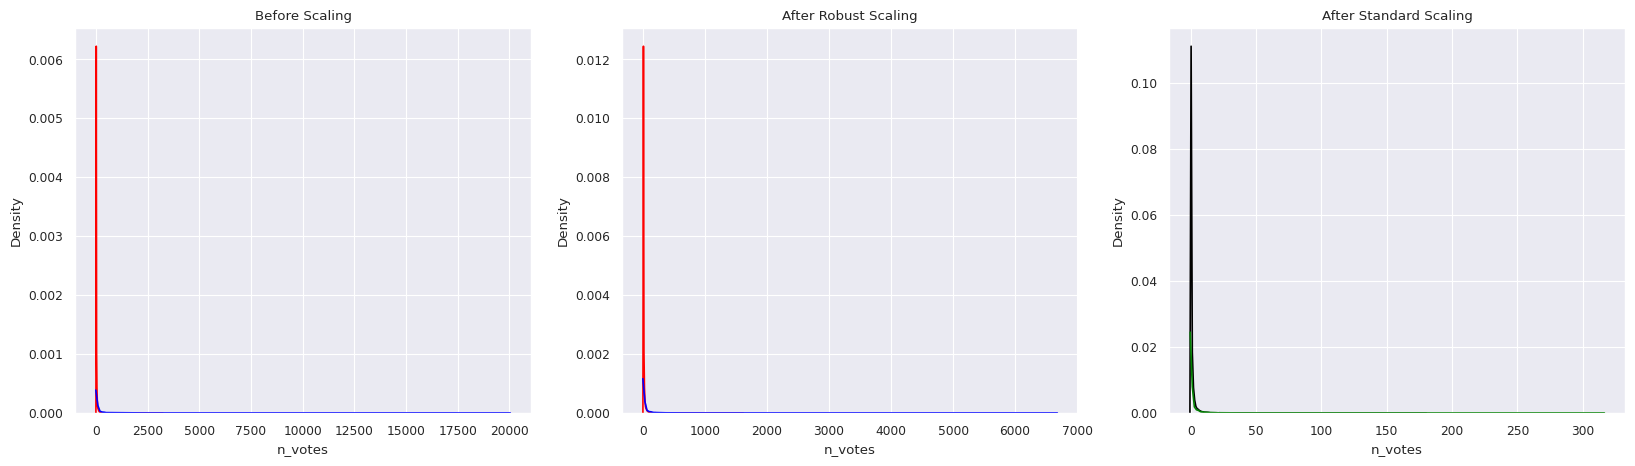

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(xa['n_votes'], ax = ax1, color ='r')
sns.kdeplot(xa['read_length_days'], ax = ax1, color ='b')

ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['n_votes'], ax = ax2, color ='red')
sns.kdeplot(robust_df['read_length_days'], ax = ax2, color ='blue')

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['n_votes'], ax = ax3, color ='black')
sns.kdeplot(standard_df['read_length_days'], ax = ax3, color ='g')
plt.show()

## где-то тут должны быть пайплайны если я их сделаю....

In [ ]:
# model_title = Pipeline([
#     ('tokenizer', )
    
# ])

In [ ]:
# model_title = Pipeline([
#     (
#         'vectorizer',
#         TfidfVectorizer(
#             lowercase=True, ngram_range=(4, 6), analyzer='char',
#             token_pattern = TOKEN_PATTERN,
#             stop_words=stop_words, min_df=6, max_df=0.05
#         )
#     ),
#     ('encoder', OneHotEncoder()),
#     ('clf', LogisticRegression(random_state=SEED, solver='liblinear', class_weight='balanced'))
# ])